## Intro

Predicting loan defaults using the Fannie Mae data set:

- https://degravek.github.io/project-pages/project1/2016/11/12/New-Notebook/

In [172]:
import pandas as pd
import numpy as np
import sidetable
import matplotlib.pyplot as plt
import seaborn as sns
import os
import gc

pd.set_option('max_columns',150)
pd.set_option('max_rows',150)

### Data

In [12]:
## glossary
gloss = pd.read_csv('data/crt-file-layout-and-glossary.csv', encoding='iso-8859-1')
gloss.head()

Field Position                Field Name  \
0               1         Reference Pool ID   
1               2           Loan Identifier   
2               3  Monthly Reporting Period   
3               4                   Channel   
4               5               Seller Name   

                                         Description  \
0        A unique identifier for the reference pool.   
1         A unique identifier for the mortgage loan.   
2  The month and year that pertains to the servic...   
3  The origination channel used by the party that...   
4  The name of the entity that delivered the mort...   

                                    Date Bound Notes  \
0                                                NaN   
1                                                NaN   
2  SF Loan Performance: Enhanced format with the ...   
3                                                NaN   
4                                                NaN   

                         Respective Disclosure Notes CAS CIRT  \
0                                                NaN   ?    ?   
1  The Loan Identifier does not correspond to oth...   ?    ?   
2                                                NaN   ?    ?   
3          Retail = R; Correspondent = C; Broker = B   ?    ?   
4  CAS/CIRT: For sellers whose combined loans' co...   ?    ?   

  Single-Family (SF) Loan Performance           Type Max Length  
0                                 NaN  ALPHA-NUMERIC       X(4)  
1                                   ?  ALPHA-NUMERIC      X(12)  
2                                   ?           DATE     MMYYYY  
3                                   ?  ALPHA-NUMERIC       X(1)  
4                                   ?  ALPHA-NUMERIC      X(50)

In [13]:
cols = gloss['Field Name'].values
cols

array(['Reference Pool ID', 'Loan Identifier', 'Monthly Reporting Period',
       'Channel', 'Seller Name', 'Servicer Name', 'Master Servicer',
       'Original Interest Rate', 'Current Interest Rate', 'Original UPB',
       'UPB at Issuance', 'Current Actual UPB', 'Original Loan Term',
       'Origination Date', 'First Payment Date', 'Loan Age',
       'Remaining Months to Legal Maturity',
       'Remaining Months To Maturity', 'Maturity Date',
       'Original Loan to Value Ratio (LTV)',
       'Original Combined Loan to Value Ratio (CLTV)',
       'Number of Borrowers', 'Debt-To-Income (DTI)',
       'Borrower Credit Score at Origination',
       'Co-Borrower Credit Score at Origination',
       'First Time Home Buyer Indicator', 'Loan Purpose ',
       'Property Type', 'Number of Units', 'Occupancy Status',
       'Property State', 'Metropolitan Statistical Area (MSA)',
       'Zip Code Short', 'Mortgage Insurance Percentage',
       'Amortization Type', 'Prepayment Penalty Indicat

In [33]:
# df = pd.read_csv('data/CAS_Oct21.csv', delimiter='|')
# df = pd.read_csv('data/2021Q2.csv', delimiter='|', names=cols, index_col=False)
df = pd.read_csv('data/2007Q4.csv', delimiter='|', names=cols, index_col=False)
df.head()

C:\Users\schillw\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (40,101,105) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Reference Pool ID  Loan Identifier  Monthly Reporting Period Channel  \
0                NaN     100002296854                    112007       C   
1                NaN     100002296854                    122007       C   
2                NaN     100002296854                     12008       C   
3                NaN     100002296854                     22008       C   
4                NaN     100002296854                     32008       C   

             Seller Name          Servicer Name  Master Servicer  \
0  Bank Of America, N.A.  Bank Of America, N.A.              NaN   
1  Bank Of America, N.A.  Bank Of America, N.A.              NaN   
2  Bank Of America, N.A.  Bank Of America, N.A.              NaN   
3  Bank Of America, N.A.  Bank Of America, N.A.              NaN   
4  Bank Of America, N.A.  Bank Of America, N.A.              NaN   

   Original Interest Rate  Current Interest Rate  Original UPB  \
0                   6.625                  6.625      343000.0   
1                   6.625                  6.625      343000.0   
2                   6.625                  6.625      343000.0   
3                   6.625                  6.625      343000.0   
4                   6.625                  6.625      343000.0   

   UPB at Issuance  Current Actual UPB  Original Loan Term  Origination Date  \
0              NaN                 0.0                 360            102007   
1              NaN                 0.0                 360            102007   
2              NaN                 0.0                 360            102007   
3              NaN                 0.0                 360            102007   
4              NaN                 0.0                 360            102007   

   First Payment Date  Loan Age  Remaining Months to Legal Maturity  \
0              122007       0.0                               360.0   
1              122007       1.0                               359.0   
2              122007       2.0                               358.0   
3              122007       3.0                               357.0   
4              122007       4.0                               356.0   

   Remaining Months To Maturity  Maturity Date  \
0                         359.0       112037.0   
1                         358.0       112037.0   
2                         357.0       112037.0   
3                         356.0       112037.0   
4                         355.0       112037.0   

   Original Loan to Value Ratio (LTV)  \
0                                  86   
1                                  86   
2                                  86   
3                                  86   
4                                  86   

   Original Combined Loan to Value Ratio (CLTV)  Number of Borrowers  \
0                                          86.0                  2.0   
1                                          86.0                  2.0   
2                                          86.0                  2.0   
3                                          86.0                  2.0   
4                                          86.0                  2.0   

   Debt-To-Income (DTI)  Borrower Credit Score at Origination  \
0                  27.0                                 751.0   
1                  27.0                                 751.0   
2                  27.0                                 751.0   
3                  27.0                                 751.0   
4                  27.0                                 751.0   

   Co-Borrower Credit Score at Origination First Time Home Buyer Indicator  \
0                                    756.0                               N   
1                                    756.0                               N   
2                                    756.0                               N   
3                                    756.0                               N   
4                                    756.0                               N  

In [34]:
print(df.shape)

(21872319, 108)


In [35]:
df['Foreclosure Date'].isnull().sum()/len(df)

0.9982682220390073

**99.99% null**

In [36]:
df2 = df.drop_duplicates(subset='Loan Identifier', keep='last')

In [37]:
df2.shape

(391209, 108)

In [43]:
df2['Foreclosure Date'].isnull().sum()/len(df2) * 100

90.31770741470672

### columns to keep

In [131]:
c2k = [#'Reference Pool ID',
       'Loan Identifier',#'Monthly Reporting Period',
       'Channel',#'Seller Name', 'Servicer Name', #'Master Servicer',
       'Original Interest Rate','Current Interest Rate','Original UPB',
       'UPB at Issuance','Current Actual UPB','Original Loan Term','Origination Date',
       'Loan Age','Remaining Months to Legal Maturity','Remaining Months To Maturity',
       'Original Loan to Value Ratio (LTV)','Original Combined Loan to Value Ratio (CLTV)','Number of Borrowers',
       'Debt-To-Income (DTI)','Borrower Credit Score at Origination','Co-Borrower Credit Score at Origination',
       'First Time Home Buyer Indicator','Loan Purpose ','Property Type','Number of Units','Occupancy Status',
       #'Property State', 
       'Zip Code Short', #'Metropolitan Statistical Area (MSA)',
       'Mortgage Insurance Percentage','Amortization Type','Prepayment Penalty Indicator',
       'Interest Only Loan Indicator','Interest Only First Principal And Interest Payment Date',
       'Months to Amortization',
       #'Current Loan Delinquency Status',#'Loan Payment History',
       'Modification Flag',
       'Scheduled Principal Current','Total Principal Current','Unscheduled Principal Current','Last Paid Installment Date',
       'Foreclosure Date']

In [132]:
df3 = df2[c2k]
print(df3.shape)
df3.head()

(391209, 36)


Loan Identifier Channel  Original Interest Rate  Current Interest Rate  \
14      100002296854       C                   6.625                    NaN   
83      100006876815       C                   6.250                    NaN   
246     100008184591       B                   6.625                    5.0   
342     100008870761       B                   6.500                    NaN   
482     100013284158       B                   6.625                    NaN   

     Original UPB  UPB at Issuance  Current Actual UPB  Original Loan Term  \
14       343000.0              NaN                0.00                 360   
83       400000.0              NaN                0.00                 360   
246       81000.0              NaN            64046.27                 360   
342      119000.0              NaN                0.00                 360   
482      205000.0              NaN                0.00                 360   

     Origination Date  Loan Age  Remaining Months to Legal Maturity  \
14             102007       NaN                                 NaN   
83             102007       NaN                                 NaN   
246            112007     162.0                               457.0   
342            112007       NaN                                 NaN   
482            102007       NaN                                 NaN   

     Remaining Months To Maturity  Original Loan to Value Ratio (LTV)  \
14                            NaN                                  86   
83                            NaN                                  62   
246                           NaN                                  64   
342                           NaN                                  71   
482                           NaN                                  27   

     Original Combined Loan to Value Ratio (CLTV)  Number of Borrowers  \
14                                           86.0                  2.0   
83                                           62.0                  2.0   
246                                          82.0                  1.0   
342                                          71.0                  1.0   
482                                          27.0                  1.0   

     Debt-To-Income (DTI)  Borrower Credit Score at Origination  \
14                   27.0                                 751.0   
83                   35.0                                 804.0   
246                  53.0                                 585.0   
342                  35.0                                 646.0   
482                  54.0                                 591.0   

     Co-Borrower Credit Score at Origination First Time Home Buyer Indicator  \
14                                     756.0                               N   
83                                     790.0                               N   
246                                      NaN                               N   
342                                      NaN                               N   
482                                      NaN                               N   

    Loan Purpose  Property Type  Number of Units Occupancy Status  \
14              C            PU                1                P   
83              P            SF                1                P   
246             R            SF                1                P   
342             R            CO                1                P   
482             C            SF                1                P   

     Zip Code Short  Mortgage Insurance Percentage Amortization Type  \
14            809.0                           25.0               FRM   
83            920.0                            NaN               FRM   
246           708.0                            NaN               FRM   
342           600.0                            NaN               FRM   
482           907.0                            NaN               FRM   

    Prepayment Pen

In [133]:
print("PRECENT NULL...")
df3.isnull().sum() / len(df3) * 100

PRECENT NULL...


Loan Identifier                                              0.000000
Channel                                                      0.000000
Original Interest Rate                                       0.000256
Current Interest Rate                                       94.327073
Original UPB                                                 0.000000
UPB at Issuance                                            100.000000
Current Actual UPB                                           0.000000
Original Loan Term                                           0.000000
Origination Date                                             0.000000
Loan Age                                                    94.352891
Remaining Months to Legal Maturity                          94.352891
Remaining Months To Maturity                                96.301721
Original Loan to Value Ratio (LTV)                           0.000000
Original Combined Loan to Value Ratio (CLTV)                 0.007924
Number of Borrowers 

In [134]:
set(['keys','labels']) - set(['labels'])

{'keys'}

In [135]:
def drop_null_pct(df, thresh=0.95, skip_cols=None) -> pd.DataFrame:
    '''drops columns with NULL percentage > threshold'''
    null_pct = df.isnull().sum()/len(df)
    null_drops = null_pct[null_pct > thresh].index
    if skip_cols is not None:
        null_drops = set(null_drops) - set(skip_cols)
    return df.drop(null_drops, axis=1)

In [136]:
dff = drop_null_pct(df3, thresh=0.90, skip_cols=['Foreclosure Date'])
print(dff.shape)
dff.head(3)

(391209, 24)


Loan Identifier Channel  Original Interest Rate  Original UPB  \
14      100002296854       C                   6.625      343000.0   
83      100006876815       C                   6.250      400000.0   
246     100008184591       B                   6.625       81000.0   

     Current Actual UPB  Original Loan Term  Origination Date  \
14                 0.00                 360            102007   
83                 0.00                 360            102007   
246            64046.27                 360            112007   

     Original Loan to Value Ratio (LTV)  \
14                                   86   
83                                   62   
246                                  64   

     Original Combined Loan to Value Ratio (CLTV)  Number of Borrowers  \
14                                           86.0                  2.0   
83                                           62.0                  2.0   
246                                          82.0                  1.0   

     Debt-To-Income (DTI)  Borrower Credit Score at Origination  \
14                   27.0                                 751.0   
83                   35.0                                 804.0   
246                  53.0                                 585.0   

     Co-Borrower Credit Score at Origination First Time Home Buyer Indicator  \
14                                     756.0                               N   
83                                     790.0                               N   
246                                      NaN                               N   

    Loan Purpose  Property Type  Number of Units Occupancy Status  \
14              C            PU                1                P   
83              P            SF                1                P   
246             R            SF                1                P   

     Zip Code Short  Mortgage Insurance Percentage Amortization Type  \
14            809.0                           25.0               FRM   
83            920.0                            NaN               FRM   
246           708.0                            NaN               FRM   

    Prepayment Penalty Indicator Interest Only Loan Indicator  \
14                             N                          NaN   
83                             N                            N   
246                            N                            N   

     Foreclosure Date  
14                NaN  
83                NaN  
246               NaN

In [137]:
dff['Loan Identifier'].nunique()

391209

In [138]:
uniqs = [] ## to drop columns with unique indicators
for c in dff.columns:
    print(c)
    try:
        print(dff[c].describe())
    except:
        pass
    print(dff[c].value_counts().head(10))
    if dff[c].nunique() <= 1:
        uniqs.append(c)
    print('='*80,'\n\n')
print(uniqs)

Loan Identifier
count    3.912090e+05
mean     5.504825e+11
std      2.599792e+11
min      1.000023e+11
25%      3.251176e+11
50%      5.506809e+11
75%      7.755272e+11
max      9.999996e+11
Name: Loan Identifier, dtype: float64
429971314637    1
290664899353    1
473526072091    1
832891146538    1
166137121596    1
498081131272    1
598896874359    1
134925732668    1
653459547001    1
196091816736    1
Name: Loan Identifier, dtype: int64


Channel
count     391209
unique         3
top            C
freq      166467
Name: Channel, dtype: object
C    166467
R    150770
B     73972
Name: Channel, dtype: int64


Original Interest Rate
count    391208.000000
mean          6.481945
std           0.387415
min           3.970000
25%           6.250000
50%           6.500000
75%           6.750000
max           9.375000
Name: Original Interest Rate, dtype: float64
6.375    64658
6.500    63167
6.250    48826
6.625    38941
6.750    34784
6.875    28885
6.125    26550
6.000    19386
5.875    

606.0    4952
600.0    3603
852.0    3456
300.0    3251
601.0    3137
750.0    3013
840.0    2948
604.0    2818
980.0    2643
853.0    2564
Name: Zip Code Short, dtype: int64


Mortgage Insurance Percentage
count    84925.000000
mean        23.044121
std          6.479819
min          6.000000
25%         17.000000
50%         25.000000
75%         25.000000
max         39.000000
Name: Mortgage Insurance Percentage, dtype: float64
25.0    42714
30.0    15872
12.0    13898
17.0     8297
35.0     2441
6.0       905
18.0      498
16.0      184
20.0      103
37.0        3
Name: Mortgage Insurance Percentage, dtype: int64


Amortization Type
count     391209
unique         1
top          FRM
freq      391209
Name: Amortization Type, dtype: object
FRM    391209
Name: Amortization Type, dtype: int64


Prepayment Penalty Indicator
count     391061
unique         1
top            N
freq      391061
Name: Prepayment Penalty Indicator, dtype: object
N    391061
Name: Prepayment Penalty Indicator,

### dropp columns with unique indicators

In [139]:
print(dff.shape)
dff.drop(uniqs, axis=1, inplace=True)
print(dff.shape)

(391209, 24)
(391209, 21)


In [140]:
print("NULL PERCENTAGE...")
dff.isnull().sum()/len(dff) * 100

NULL PERCENTAGE...


Loan Identifier                                  0.000000
Channel                                          0.000000
Original Interest Rate                           0.000256
Original UPB                                     0.000000
Current Actual UPB                               0.000000
Original Loan Term                               0.000000
Origination Date                                 0.000000
Original Loan to Value Ratio (LTV)               0.000000
Original Combined Loan to Value Ratio (CLTV)     0.007924
Number of Borrowers                              0.001534
Debt-To-Income (DTI)                             2.934748
Borrower Credit Score at Origination             0.160017
Co-Borrower Credit Score at Origination         60.062524
First Time Home Buyer Indicator                  0.091256
Loan Purpose                                     0.000000
Property Type                                    0.000000
Number of Units                                  0.000000
Occupancy Stat

### set target

if Forclosure Date is not null, then 1 else 0

In [141]:
dff['default'] = np.where(dff['Foreclosure Date'].isnull(), 0, 1)
dff['default'].hist();

try:
    dff.drop(['Foreclosure Date'], axis=1, inplace=True)
except:
    pass

In [142]:
dff.set_index("Loan Identifier", inplace=True)

### Null Fills

In [144]:
dff.head()

Channel  Original Interest Rate  Original UPB  \
Loan Identifier                                                 
100002296854          C                   6.625      343000.0   
100006876815          C                   6.250      400000.0   
100008184591          B                   6.625       81000.0   
100008870761          B                   6.500      119000.0   
100013284158          B                   6.625      205000.0   

                 Current Actual UPB  Original Loan Term  Origination Date  \
Loan Identifier                                                             
100002296854                   0.00                 360            102007   
100006876815                   0.00                 360            102007   
100008184591               64046.27                 360            112007   
100008870761                   0.00                 360            112007   
100013284158                   0.00                 360            102007   

                 Original Loan to Value Ratio (LTV)  \
Loan Identifier                                       
100002296854                                     86   
100006876815                                     62   
100008184591                                     64   
100008870761                                     71   
100013284158                                     27   

                 Original Combined Loan to Value Ratio (CLTV)  \
Loan Identifier                                                 
100002296854                                             86.0   
100006876815                                             62.0   
100008184591                                             82.0   
100008870761                                             71.0   
100013284158                                             27.0   

                 Number of Borrowers  Debt-To-Income (DTI)  \
Loan Identifier                                              
100002296854                     2.0                  27.0   
100006876815                     2.0                  35.0   
100008184591                     1.0                  53.0   
100008870761                     1.0                  35.0   
100013284158                     1.0                  54.0   

                 Borrower Credit Score at Origination  \
Loan Identifier                                         
100002296854                                    751.0   
100006876815                                    804.0   
100008184591                                    585.0   
100008870761                                    646.0   
100013284158                                    591.0   

                 Co-Borrower Credit Score at Origination  \
Loan Identifier                                            
100002296854                                       756.0   
100006876815                                       790.0   
100008184591                                         NaN   
100008870761                                         NaN   
100013284158                                         NaN   

                First Time Home Buyer Indicator Loan Purpose  Property Type  \
Loan Identifier                                                               
100002296854                                  N             C            PU   
100006876815                                  N             P            SF   
100008184591                                  N             R            SF   
100008870761                                  N             R            CO   
100013284158                                  N             C            SF   

                 Number of Units Occupancy Status  Zip Code Short  \
Loan Identifier                                                     
100002296854                   1                P           809.0   
100006876815                   1                P           920.0   
100008184591                   1                P           708.0   
100008870761           

In [145]:
def null_fills(df, target=None) -> pd.DataFrame:
    ''' Fills Nulls by Instance of Target
        mean for values
        most frequent for objects
    '''
    oc = df.select_dtypes(include='object').columns
    vc = df.select_dtypes(exclude='object').columns
    
    for c in oc:
        df[c] = df.groupby(['default'])[c].transform(lambda x: x.fillna(x.value_counts().index[0])) 
        
    for c in vc:
        df[c] = df.groupby(['default'])[c].transform(lambda x: x.fillna(x.mean())) 

    return df

In [156]:
def dummy_df(df) -> pd.DataFrame:
    '''dummies out the object cols'''
    drops = []
    for c in df.select_dtypes(include='object').columns:
        if df[c].nunique() <= 2:
            tmp = df[c].value_counts()
            df[c+' '+str(tmp.index[0])] = np.where(df[c] == tmp.index[0], 1, 0)
        else:
            dum = pd.get_dummies(df[c])
            dum.columns = [c + ' ' + dc for dc in dum.columns]
            df = pd.concat([df, dum], axis=1)
        drops.append(c)
    return df.drop(drops, axis=1)

In [160]:
dff_nf = null_fills(dff)

In [161]:
dff_nf.isnull().sum()

Channel                                         0
Original Interest Rate                          0
Original UPB                                    0
Current Actual UPB                              0
Original Loan Term                              0
Origination Date                                0
Original Loan to Value Ratio (LTV)              0
Original Combined Loan to Value Ratio (CLTV)    0
Number of Borrowers                             0
Debt-To-Income (DTI)                            0
Borrower Credit Score at Origination            0
Co-Borrower Credit Score at Origination         0
First Time Home Buyer Indicator                 0
Loan Purpose                                    0
Property Type                                   0
Number of Units                                 0
Occupancy Status                                0
Zip Code Short                                  0
Mortgage Insurance Percentage                   0
default                                         0


In [162]:
dff_dum = dummy_df(dff_nf)

In [164]:
print(dff_dum.shape)
dff_dum.isnull().sum() / len(dff_dum) * 100

(391209, 30)


Original Interest Rate                          0.0
Original UPB                                    0.0
Current Actual UPB                              0.0
Original Loan Term                              0.0
Origination Date                                0.0
Original Loan to Value Ratio (LTV)              0.0
Original Combined Loan to Value Ratio (CLTV)    0.0
Number of Borrowers                             0.0
Debt-To-Income (DTI)                            0.0
Borrower Credit Score at Origination            0.0
Co-Borrower Credit Score at Origination         0.0
Number of Units                                 0.0
Zip Code Short                                  0.0
Mortgage Insurance Percentage                   0.0
default                                         0.0
Channel B                                       0.0
Channel C                                       0.0
Channel R                                       0.0
First Time Home Buyer Indicator N               0.0
Loan Purpose

### Will the loan defulat?

In [165]:
X = dff_dum.drop('default', axis=1)
y = dff_dum.default

In [166]:
X.head()

Original Interest Rate  Original UPB  Current Actual UPB  \
Loan Identifier                                                             
100002296854                      6.625      343000.0                0.00   
100006876815                      6.250      400000.0                0.00   
100008184591                      6.625       81000.0            64046.27   
100008870761                      6.500      119000.0                0.00   
100013284158                      6.625      205000.0                0.00   

                 Original Loan Term  Origination Date  \
Loan Identifier                                         
100002296854                    360            102007   
100006876815                    360            102007   
100008184591                    360            112007   
100008870761                    360            112007   
100013284158                    360            102007   

                 Original Loan to Value Ratio (LTV)  \
Loan Identifier                                       
100002296854                                     86   
100006876815                                     62   
100008184591                                     64   
100008870761                                     71   
100013284158                                     27   

                 Original Combined Loan to Value Ratio (CLTV)  \
Loan Identifier                                                 
100002296854                                             86.0   
100006876815                                             62.0   
100008184591                                             82.0   
100008870761                                             71.0   
100013284158                                             27.0   

                 Number of Borrowers  Debt-To-Income (DTI)  \
Loan Identifier                                              
100002296854                     2.0                  27.0   
100006876815                     2.0                  35.0   
100008184591                     1.0                  53.0   
100008870761                     1.0                  35.0   
100013284158                     1.0                  54.0   

                 Borrower Credit Score at Origination  \
Loan Identifier                                         
100002296854                                    751.0   
100006876815                                    804.0   
100008184591                                    585.0   
100008870761                                    646.0   
100013284158                                    591.0   

                 Co-Borrower Credit Score at Origination  Number of Units  \
Loan Identifier                                                             
100002296854                                  756.000000                1   
100006876815                                  790.000000                1   
100008184591                                  731.483114                1   
100008870761                                  731.483114                1   
100013284158                                  731.483114                1   

                 Zip Code Short  Mortgage Insurance Percentage  Channel B  \
Loan Identifier                                                             
100002296854              809.0                      25.000000          0   
100006876815              920.0                      22.898661          0   
100008184591              708.0                      22.898661          1   
100008870761              600.0                      22.898661          1   
100013284158              907.0                      22.898661          1   

                 Channel C  Channel R  First Time Home Buyer Indicator N  \
Loan Identifier                                                            
100002296854             1          0                                  1   
100006876815             1          0                                  1   
100008184591    

In [180]:
import shap
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold, StratifiedShuffleSplit
# from sklearn.model_selection import HalvingRandomSearchCV
import sklearn.metrics as sklm

# from sklearn.metrics import classification_report, roc_auc_score, f1_score
# from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, f1_score, auc, precision_score, recall_score

# import xgboost as xgb
# from xgboost import XGBRegressor, XGBClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.utils.class_weight import compute_class_weight


from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.combine import SMOTEENN
from collections import Counter

In [173]:
gc.collect()

4498

In [174]:
train, test = train_test_split(dff_dum, test_size=0.3, random_state=123)
print(train.shape, test.shape)

(273846, 30) (117363, 30)


In [181]:
# sfs = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=123)

# data = pd.concat([train[train.default == 1].sample(frac=0.5, random_state=123), 
#                   train[train.default == 0].sample(frac=0.5, random_state=123) 
#                  ], axis=0).sample(frac=1) ## shuffle

# y = data.default
# X = data.drop('default', axis=1)
# print(X.shape, y.shape)

# param_grid = {'m__max_depth':[4,5,6],
#               'm__min_samples_leaf':[1,2,4,8],
# #               'min_samples_split':[1,2,4,8], #,16], #,32],
#                   ## this REALLY didnt like Min samples split.....
#               'm__max_leaf_nodes':[2,4,8,16],
#               'm__criterion':['gini','entropy'], 
#               'm__splitter':['best','random'], 
#               'm__class_weight':['balanced'],
#              }


# comb_rs = SMOTEENN()
# gs_mod = DecisionTreeClassifier()
# gs_pipeline = Pipeline(steps=[('c', comb_rs), ('m', gs_mod)], verbose=True)

# grids = HalvingRandomSearchCV(gs_pipeline, #gs_mod, 
#                               param_grid, scoring='precision', 
#                               cv=sfs, random_state=123, n_jobs=4)

# grids.fit(X, y)
# print(grids.best_params_)

In [206]:
sfs = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=123)

y = train.default
X = train.drop('default', axis=1)
print(X.shape, y.shape)

params = {'splitter': 'best', 'min_samples_leaf': 2, 
          'max_leaf_nodes': 2, 'max_depth': 6, 
          'criterion': 'gini', 'class_weight': 'balanced'}

mod = DecisionTreeClassifier(**params)
comb_rs = SMOTEENN()
pipeline = Pipeline(steps=[('c', comb_rs), ('m', mod)], verbose=True)

(273846, 29) (273846,)


In [207]:
scores2 = cross_validate(pipeline, 
                            X, y, scoring=['precision', 'recall'], 
                            cv=sfs, 
                            n_jobs=-1, return_estimator=True, return_train_score=True)

In [208]:
print(f"Train Precision Scores = {scores2['train_precision']}")
print(f"Train Recall Scores = {scores2['train_recall']}")
print('\n')
print(f"Test Precision Scores = {scores2['test_precision']}")
print(f"Test Recall Scores = {scores2['test_recall']}")

Train Precision Scores = [0.36325056 0.35269762 0.35581662 0.35185301 0.35812154]
Train Recall Scores = [0.90314377 0.91261295 0.90628213 0.91185542 0.90655268]


Test Precision Scores = [0.36060698 0.35130639 0.35655616 0.35328783 0.3582433 ]
Test Recall Scores = [0.90315657 0.90656566 0.90984848 0.90833333 0.90429293]


### test 

In [209]:
bestcv = np.argmax(np.array(scores2['test_precision']))
bestcv

0

In [210]:
bestM = scores2['estimator'][bestcv]['m']
sample_data = train.sample(frac=0.2)

bestX = sample_data.drop('default', axis=1)
besty = sample_data.default

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


[0.5 0.5]


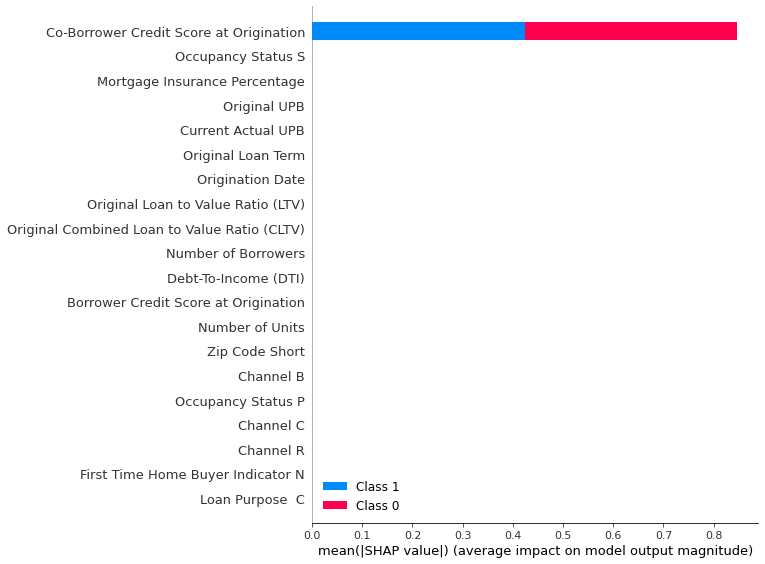

In [211]:
explainer = shap.TreeExplainer(bestM)
shap_values = explainer.shap_values(bestX)
print(explainer.expected_value)

shap.summary_plot(shap_values, bestX)

**My model is only splitting on one thing...**

In [212]:
vals = np.abs(shap_values[1]).mean(0)
feature_importance = pd.DataFrame(list(zip(X.columns,vals)),columns=['col_name','feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'],ascending=False,inplace=True)
feature_importance.head()

col_name  feature_importance_vals
10  Co-Borrower Credit Score at Origination                 0.423464
0                    Original Interest Rate                 0.000000
15                                Channel C                 0.000000
27                       Occupancy Status P                 0.000000
26                       Occupancy Status I                 0.000000

In [213]:
dtest = test.drop('default', axis=1)
test_pred = np.round(bestM.predict(dtest)).astype(int)

print(sklm.classification_report(test.default, test_pred))

              precision    recall  f1-score   support

           0       0.99      0.83      0.90    105886
           1       0.37      0.91      0.52     11477

    accuracy                           0.84    117363
   macro avg       0.68      0.87      0.71    117363
weighted avg       0.93      0.84      0.86    117363



In [214]:
testy = test.default

conf_matrix = sklm.confusion_matrix(testy, test_pred) #.T
conf_matrix = conf_matrix.astype('float')/conf_matrix.sum(axis=0)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, 
            xticklabels=["No Default","Default"],
            yticklabels=["No Default","Default"],
            cmap='coolwarm', annot=True, fmt=".2f", annot_kws={"size": 20});
plt.title("Confusion Matrix - Decision Tree Classifier")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [215]:
from IPython.display import display
from sklearn import tree

In [216]:
fig, axes = plt.subplots(1,1,figsize=(12,8), dpi=1000)
tree.plot_tree(bestM,
               feature_names = list(bestX.columns), 
               filled = True, proportion=True,
               fontsize=5);
fig.savefig('imagename.jpg')

### set the data up for the candidates

In [217]:
dff.head()

Channel  Original Interest Rate  Original UPB  \
Loan Identifier                                                 
100002296854          C                   6.625      343000.0   
100006876815          C                   6.250      400000.0   
100008184591          B                   6.625       81000.0   
100008870761          B                   6.500      119000.0   
100013284158          B                   6.625      205000.0   

                 Current Actual UPB  Original Loan Term  Origination Date  \
Loan Identifier                                                             
100002296854                   0.00                 360            102007   
100006876815                   0.00                 360            102007   
100008184591               64046.27                 360            112007   
100008870761                   0.00                 360            112007   
100013284158                   0.00                 360            102007   

                 Original Loan to Value Ratio (LTV)  \
Loan Identifier                                       
100002296854                                     86   
100006876815                                     62   
100008184591                                     64   
100008870761                                     71   
100013284158                                     27   

                 Original Combined Loan to Value Ratio (CLTV)  \
Loan Identifier                                                 
100002296854                                             86.0   
100006876815                                             62.0   
100008184591                                             82.0   
100008870761                                             71.0   
100013284158                                             27.0   

                 Number of Borrowers  Debt-To-Income (DTI)  \
Loan Identifier                                              
100002296854                     2.0                  27.0   
100006876815                     2.0                  35.0   
100008184591                     1.0                  53.0   
100008870761                     1.0                  35.0   
100013284158                     1.0                  54.0   

                 Borrower Credit Score at Origination  \
Loan Identifier                                         
100002296854                                    751.0   
100006876815                                    804.0   
100008184591                                    585.0   
100008870761                                    646.0   
100013284158                                    591.0   

                 Co-Borrower Credit Score at Origination  \
Loan Identifier                                            
100002296854                                  756.000000   
100006876815                                  790.000000   
100008184591                                  731.483114   
100008870761                                  731.483114   
100013284158                                  731.483114   

                First Time Home Buyer Indicator Loan Purpose  Property Type  \
Loan Identifier                                                               
100002296854                                  N             C            PU   
100006876815                                  N             P            SF   
100008184591                                  N             R            SF   
100008870761                                  N             R            CO   
100013284158                                  N             C            SF   

                 Number of Units Occupancy Status  Zip Code Short  \
Loan Identifier                                                     
100002296854                   1                P           809.0   
100006876815                   1                P           920.0   
100008184591                   1                P           708.0   
100008870761           

In [222]:
sub_gloss = []
for c in dff.columns:
    print(c)
    item = gloss[gloss['Field Name'] == c]
    sub_gloss.append(item)

Channel
Original Interest Rate
Original UPB
Current Actual UPB
Original Loan Term
Origination Date
Original Loan to Value Ratio (LTV)
Original Combined Loan to Value Ratio (CLTV)
Number of Borrowers
Debt-To-Income (DTI)
Borrower Credit Score at Origination
Co-Borrower Credit Score at Origination
First Time Home Buyer Indicator
Loan Purpose 
Property Type
Number of Units
Occupancy Status
Zip Code Short
Mortgage Insurance Percentage
default


In [225]:
new_gloss = pd.concat(sub_gloss).drop(['Field Position'], axis=1)
new_gloss

Field Name  \
3                                        Channel   
7                         Original Interest Rate   
9                                   Original UPB   
11                            Current Actual UPB   
12                            Original Loan Term   
13                              Origination Date   
19            Original Loan to Value Ratio (LTV)   
20  Original Combined Loan to Value Ratio (CLTV)   
21                           Number of Borrowers   
22                          Debt-To-Income (DTI)   
23          Borrower Credit Score at Origination   
24       Co-Borrower Credit Score at Origination   
25               First Time Home Buyer Indicator   
26                                 Loan Purpose    
27                                 Property Type   
28                               Number of Units   
29                              Occupancy Status   
32                                Zip Code Short   
33                 Mortgage Insurance Percentage   

                                          Description  \
3   The origination channel used by the party that...   
7   The original interest rate on a mortgage loan ...   
9   The dollar amount of the loan as stated on the...   
11  The current actual outstanding unpaid principa...   
12  For fixed-rate, adjustable-rate and Interest-o...   
13                  The date of each individual note.   
19  The ratio, expressed as a percentage, obtained...   
20  The ratio, expressed as a percentage, obtained...   
21  The number of individuals obligated to repay t...   
22  The ratio obtained by dividing the total month...   
23  A numerical value used by the financial servic...   
24  A numerical value used by the financial servic...   
25  An indicator that denotes if the borrower or c...   
26  An indicator that denotes whether the mortgage...   
27  An indicator that denotes whether the property...   
28  The number of units comprising the related mor...   
29  The classification describing the property occ...   
32  Limited to the first three digits of the code ...   
33  The original percentage of mortgage insurance ...   

                                     Date Bound Notes  \
3                                                 NaN   
7   CAS/CIRT: Enhanced format starting with the Ju...   
9   SF Loan Performance: Enhanced format with the ...   
11                                                NaN   
12                                                NaN   
13  SF Loan Performance: Enhanced format with the ...   
19                                                NaN   
20                                                NaN   
21                                                NaN   
22  CAS/CIRT: Enhanced format starting with the Ju...   
23                                                NaN   
24                                                NaN   
25                                                NaN   
26  CAS/CIRT: Enhanced format starting with the Ju...   
27  CAS/CIRT: Enhanced format starting with the Ju...   
28                                                NaN   
29  CAS/CIRT: Enhanced format starting with the Ju...   
32                                                NaN   
33                                                NaN   

                          Respective Disclosure Notes CAS CIRT  \
3           Retail = R; Correspondent = C; Broker = B   ?    ?   
7                                                 NaN   ?    ?   
9                   Values disclosed will be rounded.   ?    ?   
11  For a mortgage loan that has been modified, th...   ?    ?   
12                                                NaN   ?    ?   
13                                                NaN   ?    ?   
19  This field is calculated by dividing the origi...   ?    ?   
20  This field is calculated by adding together (i...   ?    ?   
21                                                NaN   ?    ?   
22  For values outside the allowable range, or if ...  